# Introduction to Synthetic Aperture Radar Using Python and MATLAB

## by Andy Harrison - &copy; Artech House 2022

---

## Example 7.6.3 Noise Equivalent Sigma Zero
---

**Import modules**

In [1]:
%matplotlib inline

import numpy as np

from scipy.constants import pi, speed_of_light, Boltzmann

from matplotlib import pyplot as plt

**Set the operating frequency (Hz)**

In [2]:
operating_frequency = 9.65e9

**Set the signal bandwidth (Hz)**

In [3]:
bandwidth = 300e6

**Set the effective aperture (m^2)**

In [4]:
effective_aperture = np.linspace(1, 500, 500)

**Set the average power (W)**

In [5]:
average_power = 320

**Set the platform velocity (m/s)**

In [6]:
velocity = 7.8e3

**Set the system temperature (K)**

In [7]:
system_temperature = 290

**Set the noise figure (linear)**

In [8]:
noise_figure = 2

**Set the losses (linear)**

In [9]:
losses = 2

**Calculate the range resolution (m)**

In [10]:
range_resolution = speed_of_light / (2 * bandwidth)

**Calculate the wavelength (m)**

In [11]:
wavelength = speed_of_light / operating_frequency

**Calculate and plot the NESZ for varying values of slant range**

In [12]:
slant_ranges = [400e3, 600e3, 800e3, 1200e3]

**Display the results**

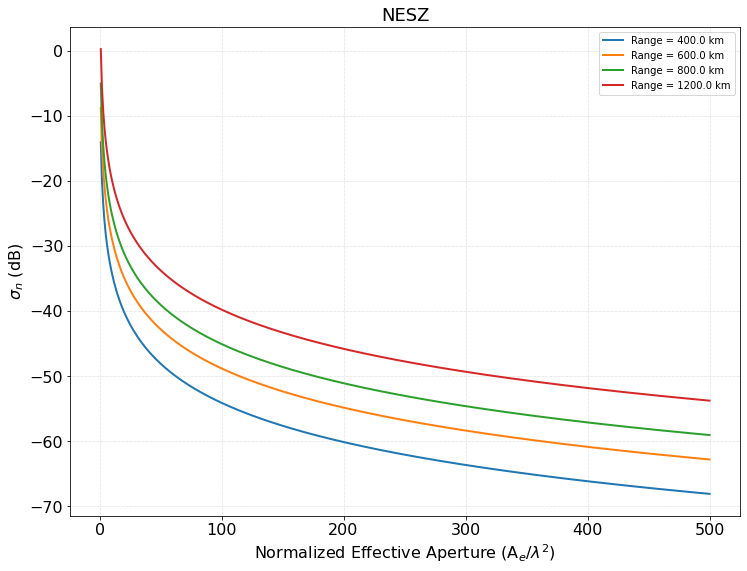

In [13]:
# Set the figure size

plt.rcParams["figure.figsize"] = (12, 9)



# Loop over all the slant ranges
for slant_range in slant_ranges:
    
    nesz = 8 * pi * wavelength * slant_range**3 * velocity * Boltzmann * system_temperature * noise_figure * losses / \
        (average_power * effective_aperture**2 * range_resolution)
    
    plt.plot(effective_aperture, 10 * np.log10(nesz), linewidth=2, label=f'Range = {slant_range/1e3} km')




# Set the plot title and labels

plt.title('NESZ', size=18)

plt.xlabel('Normalized Effective Aperture (A$_e/\lambda^2$)', size=16)

plt.ylabel('$\sigma_n$ (dB)', size=16)



# Set the tick label size

plt.tick_params(labelsize=16)



# Turn on the grid

plt.grid(linestyle=':', linewidth=0.5)



# Display the legend

plt.legend(loc='best')

In [14]:
# Calculate and plot the NESZ contours

slant_range = np.linspace(400e3, 1200e3, 500)



# Create the mesh

effective_aperture = np.linspace(1, 100, 500)

ae, sr = np.meshgrid(effective_aperture, slant_range)



# Calculate NESZ

nesz = 8 * pi * wavelength * sr**3 * velocity * Boltzmann * system_temperature * noise_figure * losses / \
    (average_power * ae**2 * range_resolution)

**Display the results**

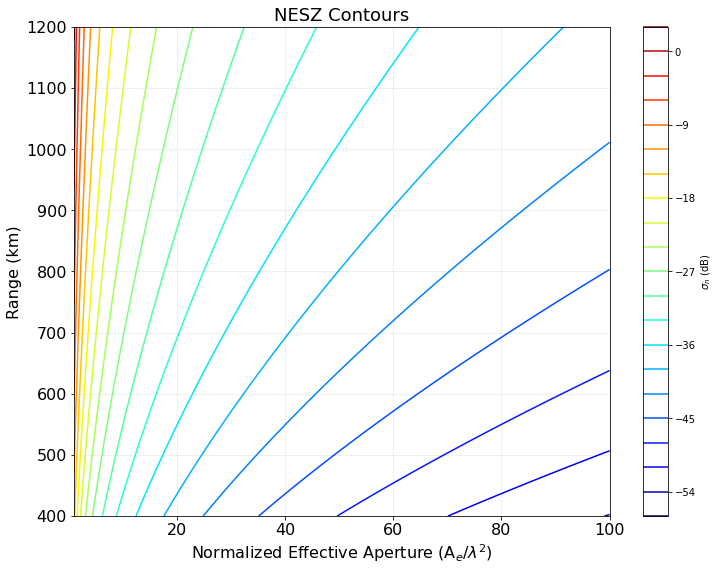

In [15]:
# Set the figure size

plt.rcParams["figure.figsize"] = (12, 9)



# Plot the contours

plt.contour(ae, sr/1e3, 10 * np.log10(nesz), 20, cmap='jet')


# Set the plot title and labels

plt.title('NESZ Contours', size=18)

plt.xlabel('Normalized Effective Aperture (A$_e/\lambda^2$)', size=16)

plt.ylabel('Range (km)', size=16)



# Set the tick label size

plt.tick_params(labelsize=16)



# Turn on the grid

plt.grid(linestyle=':', linewidth=0.5)



# Turn on the colorbar

plt.colorbar(label='$\sigma_n$ (dB)')
plt.show()